# Decision Tree Lab

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import arff
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

## 1 Debug and Eval

### 1.1 (5%) Debug

- Train on the [Iris Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/iris.arff) using all default parameters.
- If using Dataframes you may want to change the class values from bytecodes to strings with
iris_df['class'] = iris_df['class'].str.decode('utf-8')

Expected Accuracy = [1.0]


In [ ]:
#Debug

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


### 1.2 (5%) Evaluation

- Train on the iris data set again but this time with max_depth = 3 and output the accuracy

In [ ]:
# Evaluation

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


Discussion

In this task I trained the DecisionTreeClassifier on the Iris dataset. I loaded in the dataset, coded two versions of the DecisionTreeClassifier (max_depth=default and max_depth=3), and ran them on the dataset. I did this because I wanted to see how changing this hyperparameter impacted performance. Leaving it as default resulted in a 100% accuracy. This is because the DecisionTreeClassifier had enough variables>branches to cleanly divide the different classes. Note that using the DecisionTreeClassifier is rather easy. I was surprised to observe that the max_depth=3 version also had 100% accuracy. I am not sure why it does so well, but my hypothesis is that it was just able to find the perfect set of variables within a depth of 3.

## 2. Missing Values, N-fold CV, and Decision Tree Items  

### 2.1 (15%) Handling missing values
- Use this [Voting Dataset with missing values](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/voting_with_missing.arff)
- This data set has missing data.  Create an extra feature value for each feature with missing data. For example, if the feature were color with possible values R, G, B, you would add a fourth value (e.g. U or ? for unknown).
- Do not use a stopping criteria. Induce the tree as far as it can go (until classes are pure or there are no more data or attributes to split on).
- SKlearn does not allow nominal features, which initially seems odd. However, SKlearn uses the binary CART algorithm where a nominal data value like color is broken down into blue or not blue, red or not red, etc.  It is thus natural to just use one-hot encoding for each nominal feature.
- Use an 80/20 train/test split.
- Report the training and test set accuracies.

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
def get_voting_xy ():
  ds = arff.loadarff('voting_with_missing.arff')
  df = pd.DataFrame(ds[0])

  df = df.replace(b'?', np.nan)
  le = LabelEncoder()
  df['Class'] = le.fit_transform(df['Class'])

  X = df.drop('Class', axis=1)
  X = pd.get_dummies(X)
  y = df['Class']

  return X, y

def voting_dt_classifier(X, y, depth=None):
  Y = pd.get_dummies(y)

  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

  clf = DecisionTreeClassifier(max_depth=depth)
  clf.fit(X_train, y_train)

  y_pred_train = clf.predict(X_train)
  accuracy_train = accuracy_score(y_train, y_pred_train)
  y_pred_test = clf.predict(X_test)
  accuracy_test = accuracy_score(y_test, y_pred_test)

  return clf, accuracy_train, accuracy_test

In [ ]:
# Learn Voting with missing values.

X, y = get_voting_xy()

clfv, accuracy_train, accuracy_test = voting_dt_classifier(X, y)

print(accuracy_train, accuracy_test)

1.0 0.9310344827586207


Discussion including explaining how the missing values were handled by your model

In this task I trained the DecisionTreeClassifier on incomplete data. I loaded in the incomplete voting dataset, changed its unknown values to be a new value type, and then ran it through the DecisionTreeClassifier. I did this because I wanted to see how the DecisionTreeClassifier performed with unknown data. The missing values were handled by being turned into a new value (no=0, yes=1, ?=2). This is so the DecisionTreeClassifier could split based on whether the value was no/not_no and then yes/unknown (from the not_no node). Note that the training accuracy is 100%. I was surprised to observe that the testing accuracy is also close to or above 90%. I am not sure why it scores so well, but my hypothesis is that not giving the DecisionTreeClassifier a depth limit allowed it to do really well.

### 2.2 (15%)  N-fold Cross Validation
- Learn the [Cars Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/cars.arff) with the decision tree.
- Create a table with the 10-fold cross validation accuracies and show the average predicted accuracy.
- Try it again with 5-fold CV and create and show that table also.

In [ ]:
def get_car_xy ():
  ds = arff.loadarff('cars.arff')
  df = pd.DataFrame(ds[0])

  le = LabelEncoder()
  df['class'] = le.fit_transform(df['class'])

  X = df.drop('class', axis=1)
  X = pd.get_dummies(X)
  y = df['class']

  return X, y

def car_dt_classifier(X, y, crit="gini", cv=None, depth=None):
  Y = pd.get_dummies(y)

  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

  clf = DecisionTreeClassifier(criterion=crit, max_depth=depth)

  accuracies = cross_val_score(clf, X, Y, cv=cv, scoring='accuracy')

  clf.fit(X_train, y_train)

  return clf, accuracies

In [ ]:
from sklearn.model_selection import cross_val_score

X, y = get_car_xy()

clf10, accuracies10 = car_dt_classifier(X, y, "gini", 10)

print("10-Fold CV Accs:")
print(pd.DataFrame({'Fold': range(1, 11), 'Accuracy': accuracies10}))
print("10-Fold CV Acc avg:")
print(accuracies10.mean())

print()

clf5, accuracies5 = car_dt_classifier(X, y, "gini", 5)

print("5-Fold CV Accs:")
print(pd.DataFrame({'Fold': range(1, 6), 'Accuracy': accuracies5}))
print("5-Fold CV Acc avg:")
print(accuracies5.mean())

10-Fold CV Accs:
   Fold  Accuracy
0     1  0.820809
1     2  0.953757
2     3  0.872832
3     4  0.982659
4     5  0.734104
5     6  0.768786
6     7  0.763006
7     8  0.907514
8     9  0.866279
9    10  0.941860
10-Fold CV Acc avg:
0.8611607742976206

5-Fold CV Accs:
   Fold  Accuracy
0     1  0.791908
1     2  0.820809
2     3  0.815029
3     4  0.788406
4     5  0.649275
5-Fold CV Acc avg:
0.7730853648320348


Discussion

In this task I trained the DecisionTreeClassifier with K-fold. I copied the code from 2.1, changed it to use the car dataset and K-fold, and then ran it through the DecisionTreeClassifier. I did this because I wanted to see how the DecisionTreeClassifier performed with 10-fold and 5-fold. Unsurprisingly, the 10-fold performed better. This is because splitting the data into more partitions allows the DTC to learn the data better. Note that the accuracy ranges anywhere from 100% to 70%. I was surprised to observe that the accuracies were lower than ones for previous excercises. I am not sure why this new thing (folding) scores lower, but my hypothesis is that because it is meant to reduce overfitting it naturally ends up scoring lower since it's actively trying to not memorize the data.

### 2.3 (10%) Decision Tree Intuition
For each of the two problems above (Voting and Cars):
- Print the full tree for each.  You may use tree.plot_tree(clf) or [another way](https://mljar.com/blog/visualize-decision-tree/) if you prefer.  tree.plot_tree has a number of parameters which you can try which let you print more informative trees which can help your discussion.
- Train both again with max_depth = 2 and print these smaller trees and include them in your report.
- Summarize in English what these 2 smaller decision trees have learned (i.e. look at the induced trees and describe what "rules" they discovered).
- Compare your thoughts on important features with the attribute feature_importances_

In [ ]:
#Print induced trees for the voting and car data sets
from sklearn import tree

[Text(0.40234375, 0.9375, 'x[7] <= 0.5\ngini = 0.469\nsamples = 348\nvalue = [[131, 217]\n[217, 131]]'),
 Text(0.15625, 0.8125, 'x[6] <= 0.5\ngini = 0.028\nsamples = 208\nvalue = [[3, 205]\n[205, 3]]'),
 Text(0.09375, 0.6875, 'x[22] <= 0.5\ngini = 0.346\nsamples = 9\nvalue = [[2, 7]\n[7, 2]]'),
 Text(0.0625, 0.5625, 'x[31] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [[2, 1]\n[1, 2]]'),
 Text(0.03125, 0.4375, 'gini = 0.0\nsamples = 2\nvalue = [[2, 0]\n[0, 2]]'),
 Text(0.09375, 0.4375, 'gini = 0.0\nsamples = 1\nvalue = [[0, 1]\n[1, 0]]'),
 Text(0.125, 0.5625, 'gini = 0.0\nsamples = 6\nvalue = [[0, 6]\n[6, 0]]'),
 Text(0.21875, 0.6875, 'x[4] <= 0.5\ngini = 0.01\nsamples = 199\nvalue = [[1, 198]\n[198, 1]]'),
 Text(0.1875, 0.5625, 'gini = 0.0\nsamples = 180\nvalue = [[0, 180]\n[180, 0]]'),
 Text(0.25, 0.5625, 'x[13] <= 0.5\ngini = 0.1\nsamples = 19\nvalue = [[1, 18]\n[18, 1]]'),
 Text(0.21875, 0.4375, 'gini = 0.0\nsamples = 10\nvalue = [[0, 10]\n[10, 0]]'),
 Text(0.28125, 0.4375, 'x[16] <= 

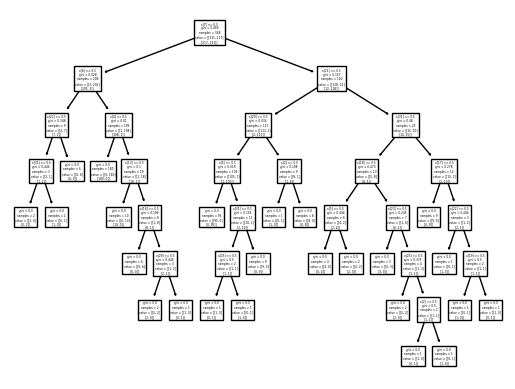

In [ ]:
X_vote, y_vote = get_voting_xy()

clf_vote, a_tr, a_te = voting_dt_classifier(X_vote, y_vote)

tree.plot_tree(clf_vote)

[Text(0.8142719072164949, 0.9642857142857143, 'x[12] <= 0.5\ngini = 0.232\nsamples = 1382\nvalue = [[1069, 313]\n[1327, 55]\n[422, 960]\n[1328, 54]]'),
 Text(0.8039626288659794, 0.8928571428571429, 'x[19] <= 0.5\ngini = 0.292\nsamples = 920\nvalue = [[607, 313]\n[865, 55]\n[422, 498]\n[866, 54]]'),
 Text(0.7936533505154639, 0.8214285714285714, 'x[3] <= 0.5\ngini = 0.314\nsamples = 621\nvalue = [[308, 313]\n[566, 55]\n[422, 199]\n[567, 54]]'),
 Text(0.6285438144329897, 0.75, 'x[0] <= 0.5\ngini = 0.312\nsamples = 459\nvalue = [[207, 252]\n[404, 55]\n[361, 98]\n[405, 54]]'),
 Text(0.4581185567010309, 0.6785714285714286, 'x[5] <= 0.5\ngini = 0.319\nsamples = 303\nvalue = [[141, 162]\n[248, 55]\n[271, 32]\n[249, 54]]'),
 Text(0.27963917525773196, 0.6071428571428571, 'x[6] <= 0.5\ngini = 0.271\nsamples = 227\nvalue = [[81, 146]\n[209, 18]\n[198, 29]\n[193, 34]]'),
 Text(0.15206185567010308, 0.5357142857142857, 'x[17] <= 0.5\ngini = 0.201\nsamples = 152\nvalue = [[38, 114]\n[152, 0]\n[126, 26

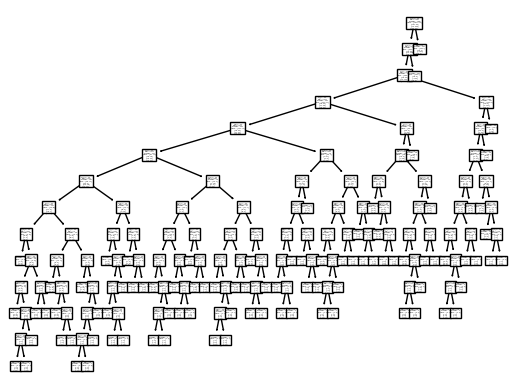

In [ ]:
X_car, y_car = get_car_xy()

clf_car, a = car_dt_classifier(X_car, y_car)

tree.plot_tree(clf_car)

,handicapped-infants_b'n',handicapped-infants_b'y',water-project-cost-sharing_b'n',water-project-cost-sharing_b'y',adoption-of-the-budget-resolution_b'n',adoption-of-the-budget-resolution_b'y',physician-fee-freeze_b'n',physician-fee-freeze_b'y',el-salvador-aid_b'n',el-salvador-aid_b'y',...,education-spending_b'n',education-spending_b'y',superfund-right-to-sue_b'n',superfund-right-to-sue_b'y',crime_b'n',crime_b'y',duty-free-exports_b'n',duty-free-exports_b'y',export-administration-act-south-africa_b'n',export-administration-act-south-africa_b'y'
0,1,0,0,1,1,0,0,1,0,1,...,0,1,0,1,0,1,1,0,0,1
1,1,0,0,1,1,0,0,1,0,1,...,0,1,0,1,0,1,1,0,0,0
2,0,0,0,1,0,1,0,0,0,1,...,1,0,0,1,0,1,1,0,1,0
3,1,0,0,1,0,1,1,0,0,0,...,1,0,0,1,1,0,1,0,0,1
4,0,1,0,1,0,1,1,0,0,1,...,0,0,0,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,1,0,1,0,0,1,0,1,0,1,...,0,1,0,1,0,1,1,0,0,1
431,1,0,1,0,0,1,1,0,1,0,...,1,0,1,0,1,0,1,0,0,1
432,1,0,0,0,1,0,0,1,0,1,...,0,1,0,1,0,1,1,0,0,1
433,1,0,1,0,1,0,0,1,0,1,...,0,1,0,1,0,1,1,0,0,1


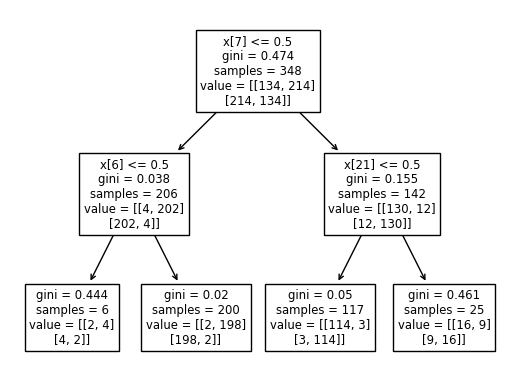

In [ ]:
X_vote, y_vote = get_voting_xy()

clf_vote, a_tr, a_te = voting_dt_classifier(X_vote, y_vote, 2)

tree.plot_tree(clf_vote)

X_vote

,buying_b'high',buying_b'low',buying_b'med',buying_b'vhigh',maint_b'high',maint_b'low',maint_b'med',maint_b'vhigh',doors_b'2',doors_b'3',...,doors_b'5more',persons_b'2',persons_b'4',persons_b'more',lug_boot_b'big',lug_boot_b'med',lug_boot_b'small',safety_b'high',safety_b'low',safety_b'med'
0,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,1,0
1,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,0,1
2,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,1,0,0
3,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
4,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,0,1,0,0,0,1,0,0,0,0,...,1,0,0,1,0,1,0,0,0,1
1724,0,1,0,0,0,1,0,0,0,0,...,1,0,0,1,0,1,0,1,0,0
1725,0,1,0,0,0,1,0,0,0,0,...,1,0,0,1,1,0,0,0,1,0
1726,0,1,0,0,0,1,0,0,0,0,...,1,0,0,1,1,0,0,0,0,1


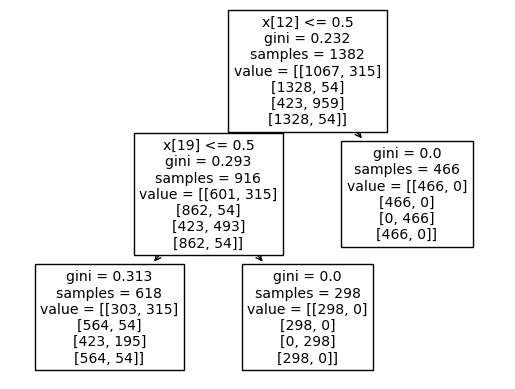

In [ ]:
X_car, y_car = get_car_xy()

clf_car, a = car_dt_classifier(X_car, y_car, "gini", None, 2)

tree.plot_tree(clf_car)

X_car

Discuss what the Trees have learned on the 2 data sets

For the incomplete voting dataset: The first split is on attribute #8, or physician-fee-freeze=yes, which is split on 0.5. The first second split is on attribute #7, or physician-fee-freeze=no, which is also split at 0.5. The second second split is on attribute #22, or synfuels-corporation-cutback=yes, which is again split at 0.5. The tree learned that the three aforementioned attributes are the most important when deciding whether someone will vote republican vs democrat. For the cars dataset: The first split is on attribute #13, or persons=2, which is split on 0.5. The second split is on attribute #20, or safety=medium, which is split at 0.5. The tree learned that the two aforementioned attributes are the most important when deciding what evaluation a car has.

### 2.4 (5%) Other Parameters
- For either of the data sets above experiment and discuss using a different split criterion (Compare Entropy and Log-loss with Gini)

In [ ]:
# Experiment with criterion parameter

0.7701868141073971


,buying_b'high',buying_b'low',buying_b'med',buying_b'vhigh',maint_b'high',maint_b'low',maint_b'med',maint_b'vhigh',doors_b'2',doors_b'3',...,doors_b'5more',persons_b'2',persons_b'4',persons_b'more',lug_boot_b'big',lug_boot_b'med',lug_boot_b'small',safety_b'high',safety_b'low',safety_b'med'
0,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,1,0
1,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,0,1
2,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,1,0,0
3,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
4,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,0,1,0,0,0,1,0,0,0,0,...,1,0,0,1,0,1,0,0,0,1
1724,0,1,0,0,0,1,0,0,0,0,...,1,0,0,1,0,1,0,1,0,0
1725,0,1,0,0,0,1,0,0,0,0,...,1,0,0,1,1,0,0,0,1,0
1726,0,1,0,0,0,1,0,0,0,0,...,1,0,0,1,1,0,0,0,0,1


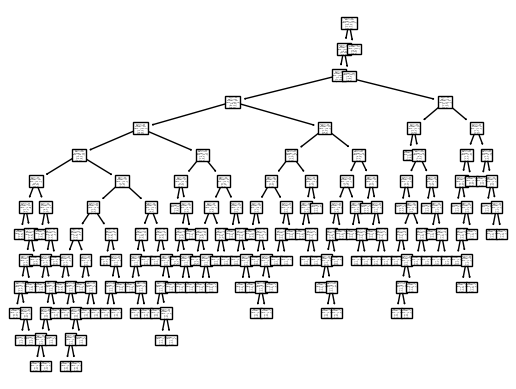

In [ ]:
X_car, y_car = get_car_xy()

clf_car, acc = car_dt_classifier(X_car, y_car, "gini")

print(acc.mean())

tree.plot_tree(clf_car)

X_car

0.7482013906341627


,buying_b'high',buying_b'low',buying_b'med',buying_b'vhigh',maint_b'high',maint_b'low',maint_b'med',maint_b'vhigh',doors_b'2',doors_b'3',...,doors_b'5more',persons_b'2',persons_b'4',persons_b'more',lug_boot_b'big',lug_boot_b'med',lug_boot_b'small',safety_b'high',safety_b'low',safety_b'med'
0,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,1,0
1,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,0,1
2,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,1,0,0
3,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
4,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,0,1,0,0,0,1,0,0,0,0,...,1,0,0,1,0,1,0,0,0,1
1724,0,1,0,0,0,1,0,0,0,0,...,1,0,0,1,0,1,0,1,0,0
1725,0,1,0,0,0,1,0,0,0,0,...,1,0,0,1,1,0,0,0,1,0
1726,0,1,0,0,0,1,0,0,0,0,...,1,0,0,1,1,0,0,0,0,1


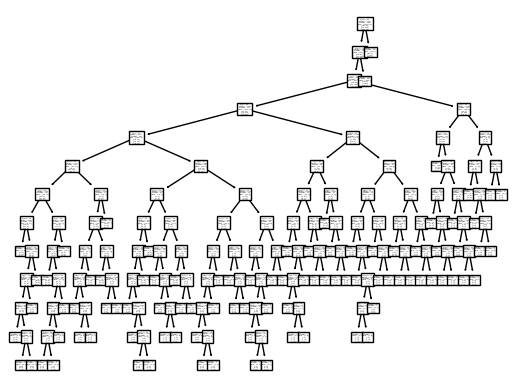

In [ ]:
X_car, y_car = get_car_xy()

clf_car, acc = car_dt_classifier(X_car, y_car, "entropy")

print(acc.mean())

tree.plot_tree(clf_car)

X_car

0.7597872162184803


,buying_b'high',buying_b'low',buying_b'med',buying_b'vhigh',maint_b'high',maint_b'low',maint_b'med',maint_b'vhigh',doors_b'2',doors_b'3',...,doors_b'5more',persons_b'2',persons_b'4',persons_b'more',lug_boot_b'big',lug_boot_b'med',lug_boot_b'small',safety_b'high',safety_b'low',safety_b'med'
0,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,1,0
1,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,0,1
2,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,1,0,0
3,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
4,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,0,1,0,0,0,1,0,0,0,0,...,1,0,0,1,0,1,0,0,0,1
1724,0,1,0,0,0,1,0,0,0,0,...,1,0,0,1,0,1,0,1,0,0
1725,0,1,0,0,0,1,0,0,0,0,...,1,0,0,1,1,0,0,0,1,0
1726,0,1,0,0,0,1,0,0,0,0,...,1,0,0,1,1,0,0,0,0,1


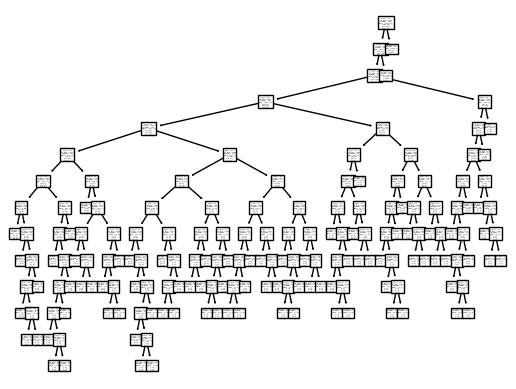

In [ ]:
X_car, y_car = get_car_xy()

clf_car, acc = car_dt_classifier(X_car, y_car, "log_loss")

print(acc.mean())

tree.plot_tree(clf_car)

X_car

Discuss criterion effects

In this task I ran the DecisionTreeClassifier with different criterion. I copied the code from 2.3, altered the code in 2.2 to use different criterion, and ran the DecisionTreeClassifier for each criterion. I did this because I wanted to see how well the different criterion methods worked. The decision trees start with a few very important features before rapidly branching outwards. This is because the rest of the features have less impact. Note that these are binary trees. I was surprised to observe that the accuracies for these different criterion are incredibly similar. I am not sure why they are so similar, but my hypothesis is that on a dataset as simple as this one their differences are practically negated.

## 3 Overfit Avoidance with Decision Trees  

Above, you found typical training and test set scores for the Cars data set when the tree is induced as far as it can go (until classes are pure or there are no more data or attributes to split on).  This usually leads to great training set scores but can potentially overfit and get lower accuracy on the test set.  You will now experiment with methods which can help avoid overfit and which could lead to better test set accuracy (though training set accuracy may decrease).  

### 3.1 Smaller and Simpler Trees (20%)
- tree_: [Read about](https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py) the tree_ attribute with its sub attributes and methods allowing you to interact with your learned tree.  You don't have to do any specific task for this part.
- Use an 80/20 train/test split for all experiments in this part and induce (learn/fit) the full tree for Cars.
- For the fully induced tree print out
    - Training set accuracy
    - Test set accuracy
    - Total number of nodes (clf.tree_.node_count)
    - Maximum tree depth (clf.tree_.max_depth)
- Experiment with the following parameters which lead to smaller and/or simpler trees which can help with overfit.  Try a few different values of each parameter and compare their train and test set accuracies and number of nodes and depth with the fully induced tree.  If you are not sure how parameters are actually working, print some trees to see their effect.  Due to the simplicity of the Cars data set you may not see as great of accuracy improvements as you would for cases where overfit is more prominent.  
    - min_samples_leaf
    - min_samples_split
    - min_impurity_decrease
- Try these parameters also, but note that they could lead to underfit
    - max_depth
    - max_leaf_nodes
    - max_features

In [ ]:
def car_dt_classifier_upgrade(X, y, m_s_l, m_s_s, m_i_d, m_d, m_l_n, m_f):
  Y = pd.get_dummies(y)

  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

  clf = DecisionTreeClassifier(min_samples_leaf=m_s_l, min_samples_split=m_s_s,
                               min_impurity_decrease=m_i_d, max_depth=m_d,
                               max_leaf_nodes=m_l_n, max_features=m_f)

  clf.fit(X_train, y_train)

  y_pred_train = clf.predict(X_train)
  accuracy_train = accuracy_score(y_train, y_pred_train)
  y_pred_test = clf.predict(X_test)
  accuracy_test = accuracy_score(y_test, y_pred_test)

  return round(accuracy_train,3), round(accuracy_test,3), clf.tree_.node_count, clf.tree_.max_depth

In [ ]:
# Explore different overfit parameters

X, y = get_car_xy()

print("Default:")
print(car_dt_classifier_upgrade(X, y, 1, 2, 0.0, None, None, None))
print("min_samples_leaf=2:")
print(car_dt_classifier_upgrade(X, y, 2, 2, 0.0, None, None, None))
print("min_samples_leaf=3:")
print(car_dt_classifier_upgrade(X, y, 3, 2, 0.0, None, None, None))
print("min_samples_leaf=4:")
print(car_dt_classifier_upgrade(X, y, 4, 2, 0.0, None, None, None))
print("min_samples_split=4:")
print(car_dt_classifier_upgrade(X, y, 1, 4, 0.0, None, None, None))
print("min_samples_split=6:")
print(car_dt_classifier_upgrade(X, y, 1, 6, 0.0, None, None, None))
print("min_samples_split=8:")
print(car_dt_classifier_upgrade(X, y, 1, 8, 0.0, None, None, None))
print("min_impurity_decrease=0.25:")
print(car_dt_classifier_upgrade(X, y, 1, 2, 0.25, None, None, None))
print("min_impurity_decrease=0.5:")
print(car_dt_classifier_upgrade(X, y, 1, 2, 0.5, None, None, None))
print("min_impurity_decrease=0.75:")
print(car_dt_classifier_upgrade(X, y, 1, 2, 0.75, None, None, None))
print("max_depth=5:")
print(car_dt_classifier_upgrade(X, y, 1, 2, 0.0, 5, None, None))
print("max_leaf_nodes=10:")
print(car_dt_classifier_upgrade(X, y, 1, 2, 0.0, None, 10, None))
print("max_features=5:")
print(car_dt_classifier_upgrade(X, y, 1, 2, 0.0, None, None, 5))

Default:
(1.0, 0.974, 175, 13)
min_samples_leaf=2:
(0.98, 0.945, 149, 13)
min_samples_leaf=3:
(0.982, 0.957, 129, 12)
min_samples_leaf=4:
(0.96, 0.948, 115, 12)
min_samples_split=4:
(0.984, 0.934, 161, 13)
min_samples_split=6:
(0.981, 0.931, 135, 12)
min_samples_split=8:
(0.968, 0.971, 119, 12)
min_impurity_decrease=0.25:
(0.707, 0.673, 1, 0)
min_impurity_decrease=0.5:
(0.713, 0.65, 1, 0)
min_impurity_decrease=0.75:
(0.707, 0.673, 1, 0)
max_depth=5:
(0.844, 0.853, 19, 5)
max_leaf_nodes=10:
(0.853, 0.835, 19, 6)
max_features=5:
(1.0, 0.954, 363, 15)


Discussion

In this task I experimented with hyperparameters to avoid overfit. I copied the car dataset codde from 2.2, altered it to take in multiple hyperparameters, and ran it many times to test each hyperparameter. I did this because I wanted to see how avoiding overfit benefitted the test accuracy. Most experiments resulted in lower scores for both accuracies. This is because avoiding rounding can easily result in fitting the data too losely. Note that overfit avoidance also resulted in lower node counts and lower max depths. I was surprised to observe that changing max_features actually increased the node count from the default. I am not sure why this hyperparameter change made more nodes, but my hypothesis is that using less features requires more back-and-forth decisions to find a model that fits the data.

### 3.2 (10%) Tree Reduction
Another approach to avoiding overfit is using pruning to reduce fully induced trees.  Induce the tree fully for Cars (no simplifying parameters such as max_depth).  Prune by setting the [ccp_alpha](https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html#sphx-glr-auto-examples-tree-plot-cost-complexity-pruning-py) parameter to a positive value. This parameter controls how aggressive the pruning is. Try some small values (e.g. ,001, ,005, etc.) and try to find and report the value which works the best.  Make a table with at least 5 ccp_alpha values and for each value include
- Training set accuracy (you chooses the size of the train/test split)
- Test set accuracy
- Total number of nodes (clf.tree_.node_count)
- Maximum tree depth (clf.tree_.max_depth)

In [ ]:
def car_dt_classifier_prune(X, y, c_a):
  Y = pd.get_dummies(y)

  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

  clf = DecisionTreeClassifier(ccp_alpha=c_a)

  clf.fit(X_train, y_train)

  y_pred_train = clf.predict(X_train)
  accuracy_train = accuracy_score(y_train, y_pred_train)
  y_pred_test = clf.predict(X_test)
  accuracy_test = accuracy_score(y_test, y_pred_test)

  return round(accuracy_train,3), round(accuracy_test,3), clf.tree_.node_count, clf.tree_.max_depth

In [ ]:
# Pruning

X, y = get_car_xy()

print(' ccp_alpha | train acc | test acc | node # | depth')
As = [0.001, 0.002, 0.003, 0.004, 0.005]
for i in range(len(As)):
  acc_train, acc_test, nodes, depth = car_dt_classifier_prune(X, y, As[i])
  print(f'   {As[i]:.3f}   |   {acc_train:.3f}   |  {acc_test:.3f}   |  {str(nodes).zfill(3)}   |  {str(depth).zfill(2)}')

 ccp_alpha | train acc | test acc | node # | depth
   0.001   |   0.970   |  0.951   |  069   |  11
   0.002   |   0.931   |  0.936   |  039   |  08
   0.003   |   0.932   |  0.899   |  035   |  08
   0.004   |   0.896   |  0.847   |  021   |  06
   0.005   |   0.852   |  0.824   |  023   |  08


Discussion

In this task I experimented with different ccp_alpha values. I copied the code from 3.1, changed it to accept different values of ccp_alpha, and tested it on several different ccp_alpha values. I did this because I wanted to see how changing ccp_alpha impacted accuracy and size. Smaller ccp_alphas result in better accuracies. This is because you aren't pruning useful data. Note that node count and depth also decrease as ccp_alpha increases. I was surprised to observe that some ccp_alphas result in test accuracies that outperform their train accuracies. I am not sure why this happens, but my hypothesis is that pruning just the right amount results in a model that happens to be a better fit for what's in the test set.

## 4. Decision Tree Regression
### 4.1 (15%) Learn a real-world regression data set of your choice (not already used in this or previous labs)
- Report tree statistics (# of nodes, # of leaf nodes, max depth)
- Report MAE on the training and test set (you choose the size of the train/test split)
- Report the DT regressor score for the training and test set.  Note that for the DT regressor this score is the coefficient of determination. Google it if you are curious.

In [ ]:
#Learn regression data set
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

def get_car_rating_xy ():
  Data_Set = arff.loadarff('car_rating.arff')
  Data_Set_df = pd.DataFrame(Data_Set[0])
  Data_Set_df = Data_Set_df.dropna()

  Data_Set_np = Data_Set_df.to_numpy()
  X = Data_Set_np[:, :-1]
  y = Data_Set_np[:, -1]
  return X, y

def car_rating_dt_regressor(X, y):
  Y = pd.get_dummies(y)
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

  clf = DecisionTreeRegressor()
  clf.fit(X_train, y_train)

  y_pred_train = clf.predict(X_train)
  MAE_train = mean_absolute_error(y_pred_train, y_train)
  r2_train = r2_score(y_train, y_pred_train)

  y_pred_test = clf.predict(X_test)
  MAE_test = mean_absolute_error(y_pred_test, y_test)
  r2_test = r2_score(y_test, y_pred_test)

  return clf.tree_.node_count, clf.tree_.n_leaves, clf.tree_.max_depth, MAE_train, MAE_test, r2_train, r2_test

In [ ]:
X, y = get_car_rating_xy()

nodes, leaves, depth, MAE_train, MAE_test, r2_train, r2_test = car_rating_dt_regressor(X, y)

print("Node count: ", nodes)
print("Leaf count: ", leaves)
print("Max depth: ", depth)
print("MAE train: ", MAE_train)
print("MAE test: ", MAE_test)
print("DTR train: ", r2_train)
print("DTR test: ", r2_test)

Node count:  459
Leaf count:  230
Max depth:  21
MAE train:  0.0
MAE test:  0.013754609787700595
DTR train:  1.0
DTR test:  0.23476864798041774


Discussion

In this task I trained the DecisionTreeRegressor on a dataset of my choice. I set up the dataset setup function, copied the code from 3.2 and edited it to use the DecisionTreeRegressor, and trained it on the dataset. I did this because I wanted to learn how to use the DecisionTreeRegressor. My tree ended up with around 460 nodes and 230 leaves over a depth of 21. This is because the tree is very long and skinny. Note that the MAE scores are very low, which means that the tree is accurate even though it is inefficient. I was surprised to observe that the DTR test score is much lower than the train score. I am not sure why this is, but my hypothesis is that the training data was overfitted by the DecisionTreeRegressor, as evident by the train score being perfect.